# Libraries

In [1]:
#misc
import warnings
warnings.filterwarnings('ignore')

# data
import pandas as pd
import numpy as np
from scipy.stats import zscore

#plotting
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style( "whitegrid")

# Load data

In [2]:
data = pd.read_csv( "data/cumulative.csv")
data.head()

,rowid,kepid,kepoi_name,kepler_name,koi_disposition,koi_pdisposition,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,1,10797460,K00752.01,Kepler-227 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,2,10797460,K00752.02,Kepler-227 c,CONFIRMED,CANDIDATE,0.969,0,0,0,...,-81.0,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
2,3,10811496,K00753.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-176.0,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
3,4,10848459,K00754.01,NaN,FALSE POSITIVE,FALSE POSITIVE,0.000,0,1,0,...,-174.0,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
4,5,10854555,K00755.01,Kepler-664 b,CONFIRMED,CANDIDATE,1.000,0,0,0,...,-211.0,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509


In [3]:
data.columns

Index(['rowid', 'kepid', 'kepoi_name', 'kepler_name', 'koi_disposition',
       'koi_pdisposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
       'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_period_err1',
       'koi_period_err2', 'koi_time0bk', 'koi_time0bk_err1',
       'koi_time0bk_err2', 'koi_impact', 'koi_impact_err1', 'koi_impact_err2',
       'koi_duration', 'koi_duration_err1', 'koi_duration_err2', 'koi_depth',
       'koi_depth_err1', 'koi_depth_err2', 'koi_prad', 'koi_prad_err1',
       'koi_prad_err2', 'koi_teq', 'koi_teq_err1', 'koi_teq_err2', 'koi_insol',
       'koi_insol_err1', 'koi_insol_err2', 'koi_model_snr', 'koi_tce_plnt_num',
       'koi_tce_delivname', 'koi_steff', 'koi_steff_err1', 'koi_steff_err2',
       'koi_slogg', 'koi_slogg_err1', 'koi_slogg_err2', 'koi_srad',
       'koi_srad_err1', 'koi_srad_err2', 'ra', 'dec', 'koi_kepmag'],
      dtype='object')

### feature explanation

feature | explanation 
:-------|:-------------
kepid   | The target identification number, as listed in the Kepler Input Catalog (KIC).
kepoi_name | Number used to identify and track a Kepler Object of Interest (KOI). The integer part designates the start, the decimal part indicated the transiting object around the star.
kepler_name | Identifier given to confirmed planets.
koi_disposition | The category of this KOI from the Exoplanet Archive : 'CONFIRMED', 'FALSE POSITIVE', 'CANDIDATE'.
koi_pdisposition | Designates the most probable physical explanation of the KOI : 'CANDIDATE', 'FALSE POSITIVE'
koi_score | Value between 0 and 1 representing confidence of KOI beeing an exoplanet candidate.
koi_fpflag_nt | Not Transit-Like Flag 
koi_fpflag_ss | Stellar Eclipse Flag 
koi_fpflag_co | Centroid Offset Flag 
koi_fpflag_ec | Ephemeris Match Indicates Contamination Flag
koi_period{_err1/2} | Orbital period and upper/lower uncertainties in days
koi_time0bk{_err1/2} | Transit Epoch (time corresponding to the center of the first detected transit) and upper/lower uncertainties.
koi_impact{_err1/2} | Impact Parameter (projected distance of stellar disc and planetary disc) and upper/lower uncertanties.
koi_duration{_err1/2} | Transit duration and upper/lower uncertainties in hours.
koi_depth{_err1/2} | Transit depth (fraction of stellar flux lost) and upper/lower uncertainties in ppm.
koi_prad{_err1/2} | Planet radius (projected) in earth radii.
koi_teq{_err1/2} | Equilibrium temperature (approximated planet temperature) and upper/lower uncertainties in Kelvin.
koi_insol{_err1/2} | Insolation flux and upper/lower uncertainties in earth flux. (Another way of giving the equilibrium temperature)
koi_steff{_err1/2} | Stellar effective temperature and upper/lower uncertainties in Kelvin.
koi_slogg{_err1/2} | Stellar surface gravity and upper/lower uncertainties in log(cm/s^2).
koi_srad{_err1/2} | Stellar radius and upper/lower uncertainties in solar radii.
koi_model_snr | Transit Signal-to-Noise ratio.
koi_tce_plnt_num | TCE Planet Number federated to the KOI.
koi_tce_delivname | TCE delivery name corresponding to the TCE data federated to the KOI.
ra | KIC right ascension in degrees
dec | KIC declination in degrees
koi_kepmag | Kepler band in mag

# EDA

### Check data types and null values

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9564 entries, 0 to 9563
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              9564 non-null   int64  
 1   kepid              9564 non-null   int64  
 2   kepoi_name         9564 non-null   object 
 3   kepler_name        2294 non-null   object 
 4   koi_disposition    9564 non-null   object 
 5   koi_pdisposition   9564 non-null   object 
 6   koi_score          8054 non-null   float64
 7   koi_fpflag_nt      9564 non-null   int64  
 8   koi_fpflag_ss      9564 non-null   int64  
 9   koi_fpflag_co      9564 non-null   int64  
 10  koi_fpflag_ec      9564 non-null   int64  
 11  koi_period         9564 non-null   float64
 12  koi_period_err1    9110 non-null   float64
 13  koi_period_err2    9110 non-null   float64
 14  koi_time0bk        9564 non-null   float64
 15  koi_time0bk_err1   9110 non-null   float64
 16  koi_time0bk_err2   9110 

In [5]:
data.loc[ data["koi_period_err1"].isna() ].info()

<class 'pandas.core.frame.DataFrame'>
Index: 454 entries, 326 to 9547
Data columns (total 50 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   rowid              454 non-null    int64  
 1   kepid              454 non-null    int64  
 2   kepoi_name         454 non-null    object 
 3   kepler_name        1 non-null      object 
 4   koi_disposition    454 non-null    object 
 5   koi_pdisposition   454 non-null    object 
 6   koi_score          150 non-null    float64
 7   koi_fpflag_nt      454 non-null    int64  
 8   koi_fpflag_ss      454 non-null    int64  
 9   koi_fpflag_co      454 non-null    int64  
 10  koi_fpflag_ec      454 non-null    int64  
 11  koi_period         454 non-null    float64
 12  koi_period_err1    0 non-null      float64
 13  koi_period_err2    0 non-null      float64
 14  koi_time0bk        454 non-null    float64
 15  koi_time0bk_err1   0 non-null      float64
 16  koi_time0bk_err2   0 non-nul

#### takeaways
1. koi_teq errors are all nan -> drop columns
2. many missing values in koi_score -> fill with median
3. remaining missing errors are almost all from the same observations -> drop these if errors are kept as relevant features
4. most features are numerical -> could mean fill missing values
5. only relevant categorical features are koi_disposition and koi_pdisposition, which are the prediction target -> drop the other categorical features used only for cataloging

In [4]:
data.drop( ["rowid", "kepid", "kepoi_name", "kepler_name", "koi_tce_delivname", "koi_tce_plnt_num", "koi_teq_err1", "koi_teq_err2"], axis=1, inplace=True)

### specifying the prediction target

Both are similar, but there are less false positives in the exoplanet archive dispositions. We will proceed with the exoplanet archive dispositions and combine the candidate and confirmed cases.

In [7]:
data["koi_disposition"].value_counts()

koi_disposition
FALSE POSITIVE    5023
CONFIRMED         2293
CANDIDATE         2248
Name: count, dtype: int64

In [8]:
data["koi_pdisposition"].value_counts()

koi_pdisposition
FALSE POSITIVE    5068
CANDIDATE         4496
Name: count, dtype: int64

In [5]:
data = data.loc[ data["koi_disposition"] != "CANDIDATE"]

data["disposition"] = data["koi_disposition"].replace( to_replace=["FALSE POSITIVE", "CANDIDATE", "CONFIRMED"], value=[0, 1, 2])
data.drop( ["koi_disposition", "koi_pdisposition"], axis=1, inplace=True)
data["disposition"].value_counts()

disposition
0    5023
2    2293
Name: count, dtype: int64

### Check feature correlations

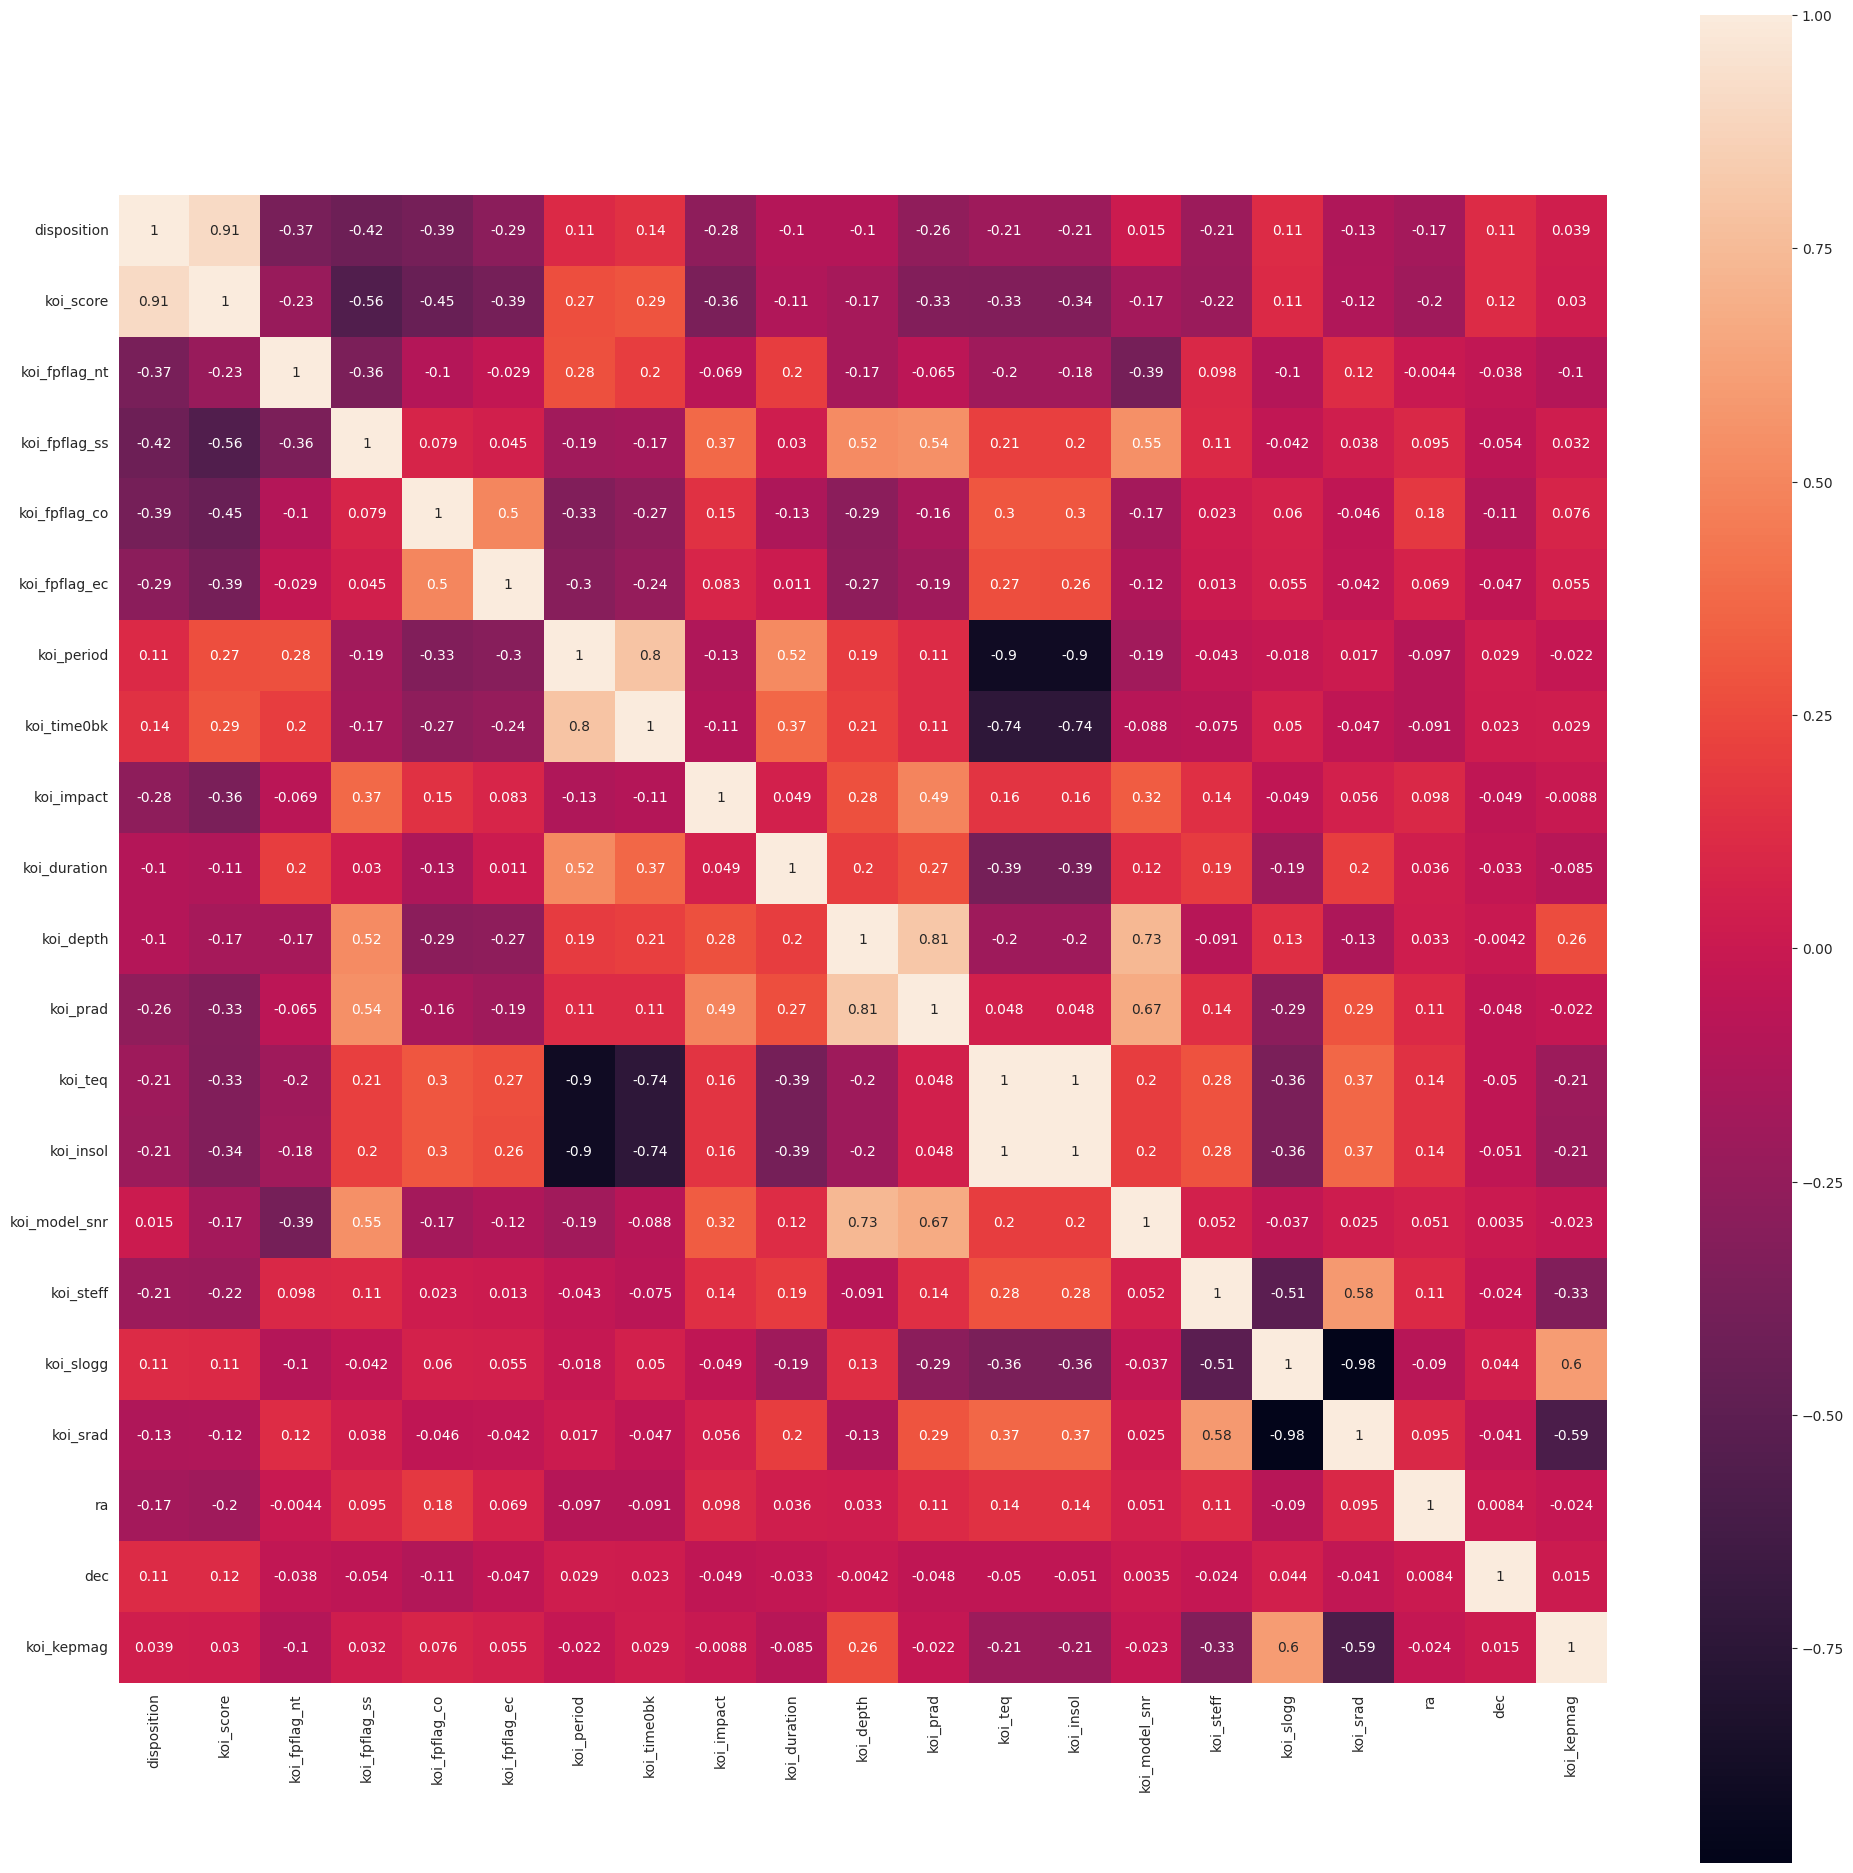

In [7]:
features = [
    'disposition', 'koi_score', 'koi_fpflag_nt', 'koi_fpflag_ss',
    'koi_fpflag_co', 'koi_fpflag_ec', 'koi_period', 'koi_time0bk', 'koi_impact',
    'koi_duration', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr',
    'koi_steff', 'koi_slogg', 'koi_srad', 'ra', 'dec', 'koi_kepmag'
]
plt.subplots(figsize=(24,24))
sns.heatmap(data[features].corr( method="spearman"), square=True, annot=True)
plt.show()

### takeaways
1. Very high correlation between koi_score and disposition -> koi_score alone can reliably determine the disposition
2. low correlation between disposition and koi_model_snr, koi_kepmag -> could be dropped
3. perfect correlation (koi_teq, kio_insol) -> given that they are both representations of the temperature, drop koi_insol
4. high correlation (koi_period, koi_time0bk) and (koi_depth, koi_prad) -> keep for now
5. high correlation between (koi_period, koi_teq) -> faster period indicates lower orbit, leading to higher planet temperature, keep for now
6. very high correlation between (koi_slogg, koi_srad) -> larger star has higher gravity -> drop koi_slogg for now 

In [10]:
data.drop( ["koi_insol", "koi_insol_err1", "koi_insol_err2", "koi_slogg", "koi_slogg_err1", "koi_slogg_err2"], axis=1, inplace=True)

In [6]:
data.head()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,disposition
0,1.000,0,0,0,0,9.488036,2.775000e-05,-2.775000e-05,170.538750,0.002160,...,5455.0,81.0,-81.0,0.927,0.105,-0.061,291.93423,48.141651,15.347,2
1,0.969,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,5455.0,81.0,-81.0,0.927,0.105,-0.061,291.93423,48.141651,15.347,2
2,0.000,0,1,0,0,19.899140,1.494000e-05,-1.494000e-05,175.850252,0.000581,...,5853.0,158.0,-176.0,0.868,0.233,-0.078,297.00482,48.134129,15.436,0
3,0.000,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,5805.0,157.0,-174.0,0.791,0.201,-0.067,285.53461,48.285210,15.597,0
4,1.000,0,0,0,0,2.525592,3.761000e-06,-3.761000e-06,171.595550,0.001130,...,6031.0,169.0,-211.0,1.046,0.334,-0.133,288.75488,48.226200,15.509,2


### feature distributions

In [7]:
data.describe()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,disposition
count,6257.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,6.939000e+03,6.939000e+03,7316.000000,6939.000000,...,7016.000000,6919.000000,6904.000000,7016.000000,6919.000000,6919.000000,7316.000000,7316.000000,7315.000000,7316.000000
mean,0.360384,0.246036,0.298387,0.254784,0.156916,58.816738,2.123294e-03,-2.123294e-03,164.877955,0.008911,...,5727.706813,146.231681,-164.975956,1.779288,0.372944,-0.417607,292.143301,43.767705,14.242005,0.626845
std,0.467090,0.430729,0.457582,0.435770,0.363747,121.082398,8.495847e-03,8.495847e-03,65.646366,0.021584,...,825.221536,47.246516,75.744604,6.203126,1.014582,2.263816,4.744932,3.599717,1.406877,0.927833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.241843,1.100000e-08,-1.725000e-01,120.515914,0.000009,...,2661.000000,0.000000,-1762.000000,0.116000,0.000000,-116.137000,279.852720,36.577381,6.966000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,2.237412,3.481000e-06,-1.758000e-04,132.588305,0.000865,...,5320.000000,109.000000,-199.000000,0.829000,0.128500,-0.258000,288.839360,40.718053,13.407000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,8.507657,2.163000e-05,-2.163000e-05,136.765693,0.003130,...,5779.500000,158.000000,-162.000000,1.000000,0.252000,-0.112000,292.306975,43.596432,14.483000,0.000000
75%,0.996000,0.000000,1.000000,1.000000,0.000000,36.184630,1.758000e-04,-3.481000e-06,170.882535,0.008835,...,6126.000000,175.000000,-117.000000,1.367000,0.365000,-0.069000,295.931460,46.692538,15.302000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1071.232624,1.725000e-01,-1.100000e-08,1472.522306,0.569000,...,15896.000000,676.000000,0.000000,229.908000,33.091000,0.000000,301.720760,52.336010,20.003000,2.000000


#### takeaways
1. Most features are heavily scewed -> take log and min-max normalize
2. Some extreme values need to be investigated

### fill missing values
##### data is heavily scewed, therefore we use median fill

In [11]:
nan_cols = data.columns[ data.isna().any()].tolist()
data[ nan_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 7316 entries, 0 to 9563
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_score          6257 non-null   float64
 1   koi_period_err1    6939 non-null   float64
 2   koi_period_err2    6939 non-null   float64
 3   koi_time0bk_err1   6939 non-null   float64
 4   koi_time0bk_err2   6939 non-null   float64
 5   koi_impact         7016 non-null   float64
 6   koi_impact_err1    6939 non-null   float64
 7   koi_impact_err2    6939 non-null   float64
 8   koi_duration_err1  6939 non-null   float64
 9   koi_duration_err2  6939 non-null   float64
 10  koi_depth          7016 non-null   float64
 11  koi_depth_err1     6939 non-null   float64
 12  koi_depth_err2     6939 non-null   float64
 13  koi_prad           7016 non-null   float64
 14  koi_prad_err1      7016 non-null   float64
 15  koi_prad_err2      7016 non-null   float64
 16  koi_teq            7016 non-n

In [12]:
for col in nan_cols :
    print( f"{col} : mean = {data[col].mean()}, median = {data[col].median()}")

koi_score : mean = 0.3603840498641522, median = 0.0
koi_period_err1 : mean = 0.0021232938847096125, median = 2.163e-05
koi_period_err2 : mean = -0.0021232938847096125, median = -2.163e-05
koi_time0bk_err1 : mean = 0.008911113748378729, median = 0.00313
koi_time0bk_err2 : mean = -0.008911113748378729, median = -0.00313
koi_impact : mean = 0.7967733323831242, median = 0.576
koi_impact_err1 : mean = 2.0800361003026375, median = 0.182
koi_impact_err2 : mean = -0.32532379305375414, median = -0.176
koi_duration_err1 : mean = 0.3187360541864822, median = 0.11
koi_duration_err2 : mean = -0.3187360541864822, median = -0.11
koi_depth : mean = 30620.113982326115, median = 507.45000000000005
koi_depth_err1 : mean = 149.54670701830236, median = 20.1
koi_depth_err2 : mean = -149.54670701830236, median = -20.1
koi_prad : mean = 129.97391676168758, median = 2.68
koi_prad_err1 : mean = 21.4979503990878, median = 0.59
koi_prad_err2 : mean = -42.06597063854048, median = -0.35
koi_teq : mean = 1148.595638

In [13]:
for col in nan_cols :
    median = data[col].median()
    data[col].fillna( median, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7316 entries, 0 to 9563
Data columns (total 35 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   koi_score          7316 non-null   float64
 1   koi_fpflag_nt      7316 non-null   int64  
 2   koi_fpflag_ss      7316 non-null   int64  
 3   koi_fpflag_co      7316 non-null   int64  
 4   koi_fpflag_ec      7316 non-null   int64  
 5   koi_period         7316 non-null   float64
 6   koi_period_err1    7316 non-null   float64
 7   koi_period_err2    7316 non-null   float64
 8   koi_time0bk        7316 non-null   float64
 9   koi_time0bk_err1   7316 non-null   float64
 10  koi_time0bk_err2   7316 non-null   float64
 11  koi_impact         7316 non-null   float64
 12  koi_impact_err1    7316 non-null   float64
 13  koi_impact_err2    7316 non-null   float64
 14  koi_duration       7316 non-null   float64
 15  koi_duration_err1  7316 non-null   float64
 16  koi_duration_err2  7316 non-n

### log transform and scale features

In [14]:
features_to_scale = [
    'koi_period', 'koi_period_err1', 'koi_period_err2',
    'koi_time0bk', 'koi_time0bk_err1', 'koi_time0bk_err2', 
    'koi_impact', 'koi_impact_err1','koi_impact_err2',
    'koi_duration', 'koi_duration_err1', 'koi_duration_err2',
    'koi_depth', 'koi_depth_err1', 'koi_depth_err2', 
    'koi_prad', 'koi_prad_err1', 'koi_prad_err2', 
    'koi_srad', 'koi_srad_err1', 'koi_srad_err2', 
    #'koi_steff', 'koi_steff_err1', 'koi_steff_err2', 
    #'ra', 'dec', 'koi_kepmag',
    'koi_model_snr', 'koi_teq', 
]

data_norm = data.copy()
eps = 1e-10
for feature in features_to_scale :
    data_norm[feature] =  np.log( np.abs( data_norm[feature]) + eps)

for col in data_norm.columns :
    minVal, maxVal = data_norm[col].min(), data_norm[col].max()
    data_norm[col] = (data_norm[col] - minVal) / (maxVal - minVal)

data_norm.describe()

,koi_score,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff,koi_steff_err1,koi_steff_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag,disposition
count,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,...,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000,7316.000000
mean,0.308218,0.246036,0.298387,0.254784,0.156916,0.447283,0.476098,0.476098,0.105731,0.508497,...,0.231872,0.217264,0.906465,0.301970,0.810261,0.759127,0.562034,0.456279,0.558107,0.313423
std,0.450187,0.430729,0.457582,0.435770,0.363747,0.227437,0.183458,0.183458,0.112045,0.163515,...,0.061064,0.068083,0.041762,0.080873,0.043798,0.046749,0.216980,0.228428,0.107907,0.463916
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.264981,0.353452,0.353452,0.038142,0.423912,...,0.202720,0.164201,0.888195,0.260428,0.793412,0.733633,0.410949,0.262756,0.494094,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.424062,0.457450,0.457450,0.050535,0.530780,...,0.235625,0.233728,0.908059,0.283747,0.816114,0.750041,0.569519,0.445410,0.576590,0.000000
75%,0.987000,0.000000,1.000000,1.000000,0.000000,0.596484,0.574015,0.574015,0.139513,0.617583,...,0.260521,0.257396,0.932463,0.321707,0.829246,0.777475,0.735262,0.641881,0.639411,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


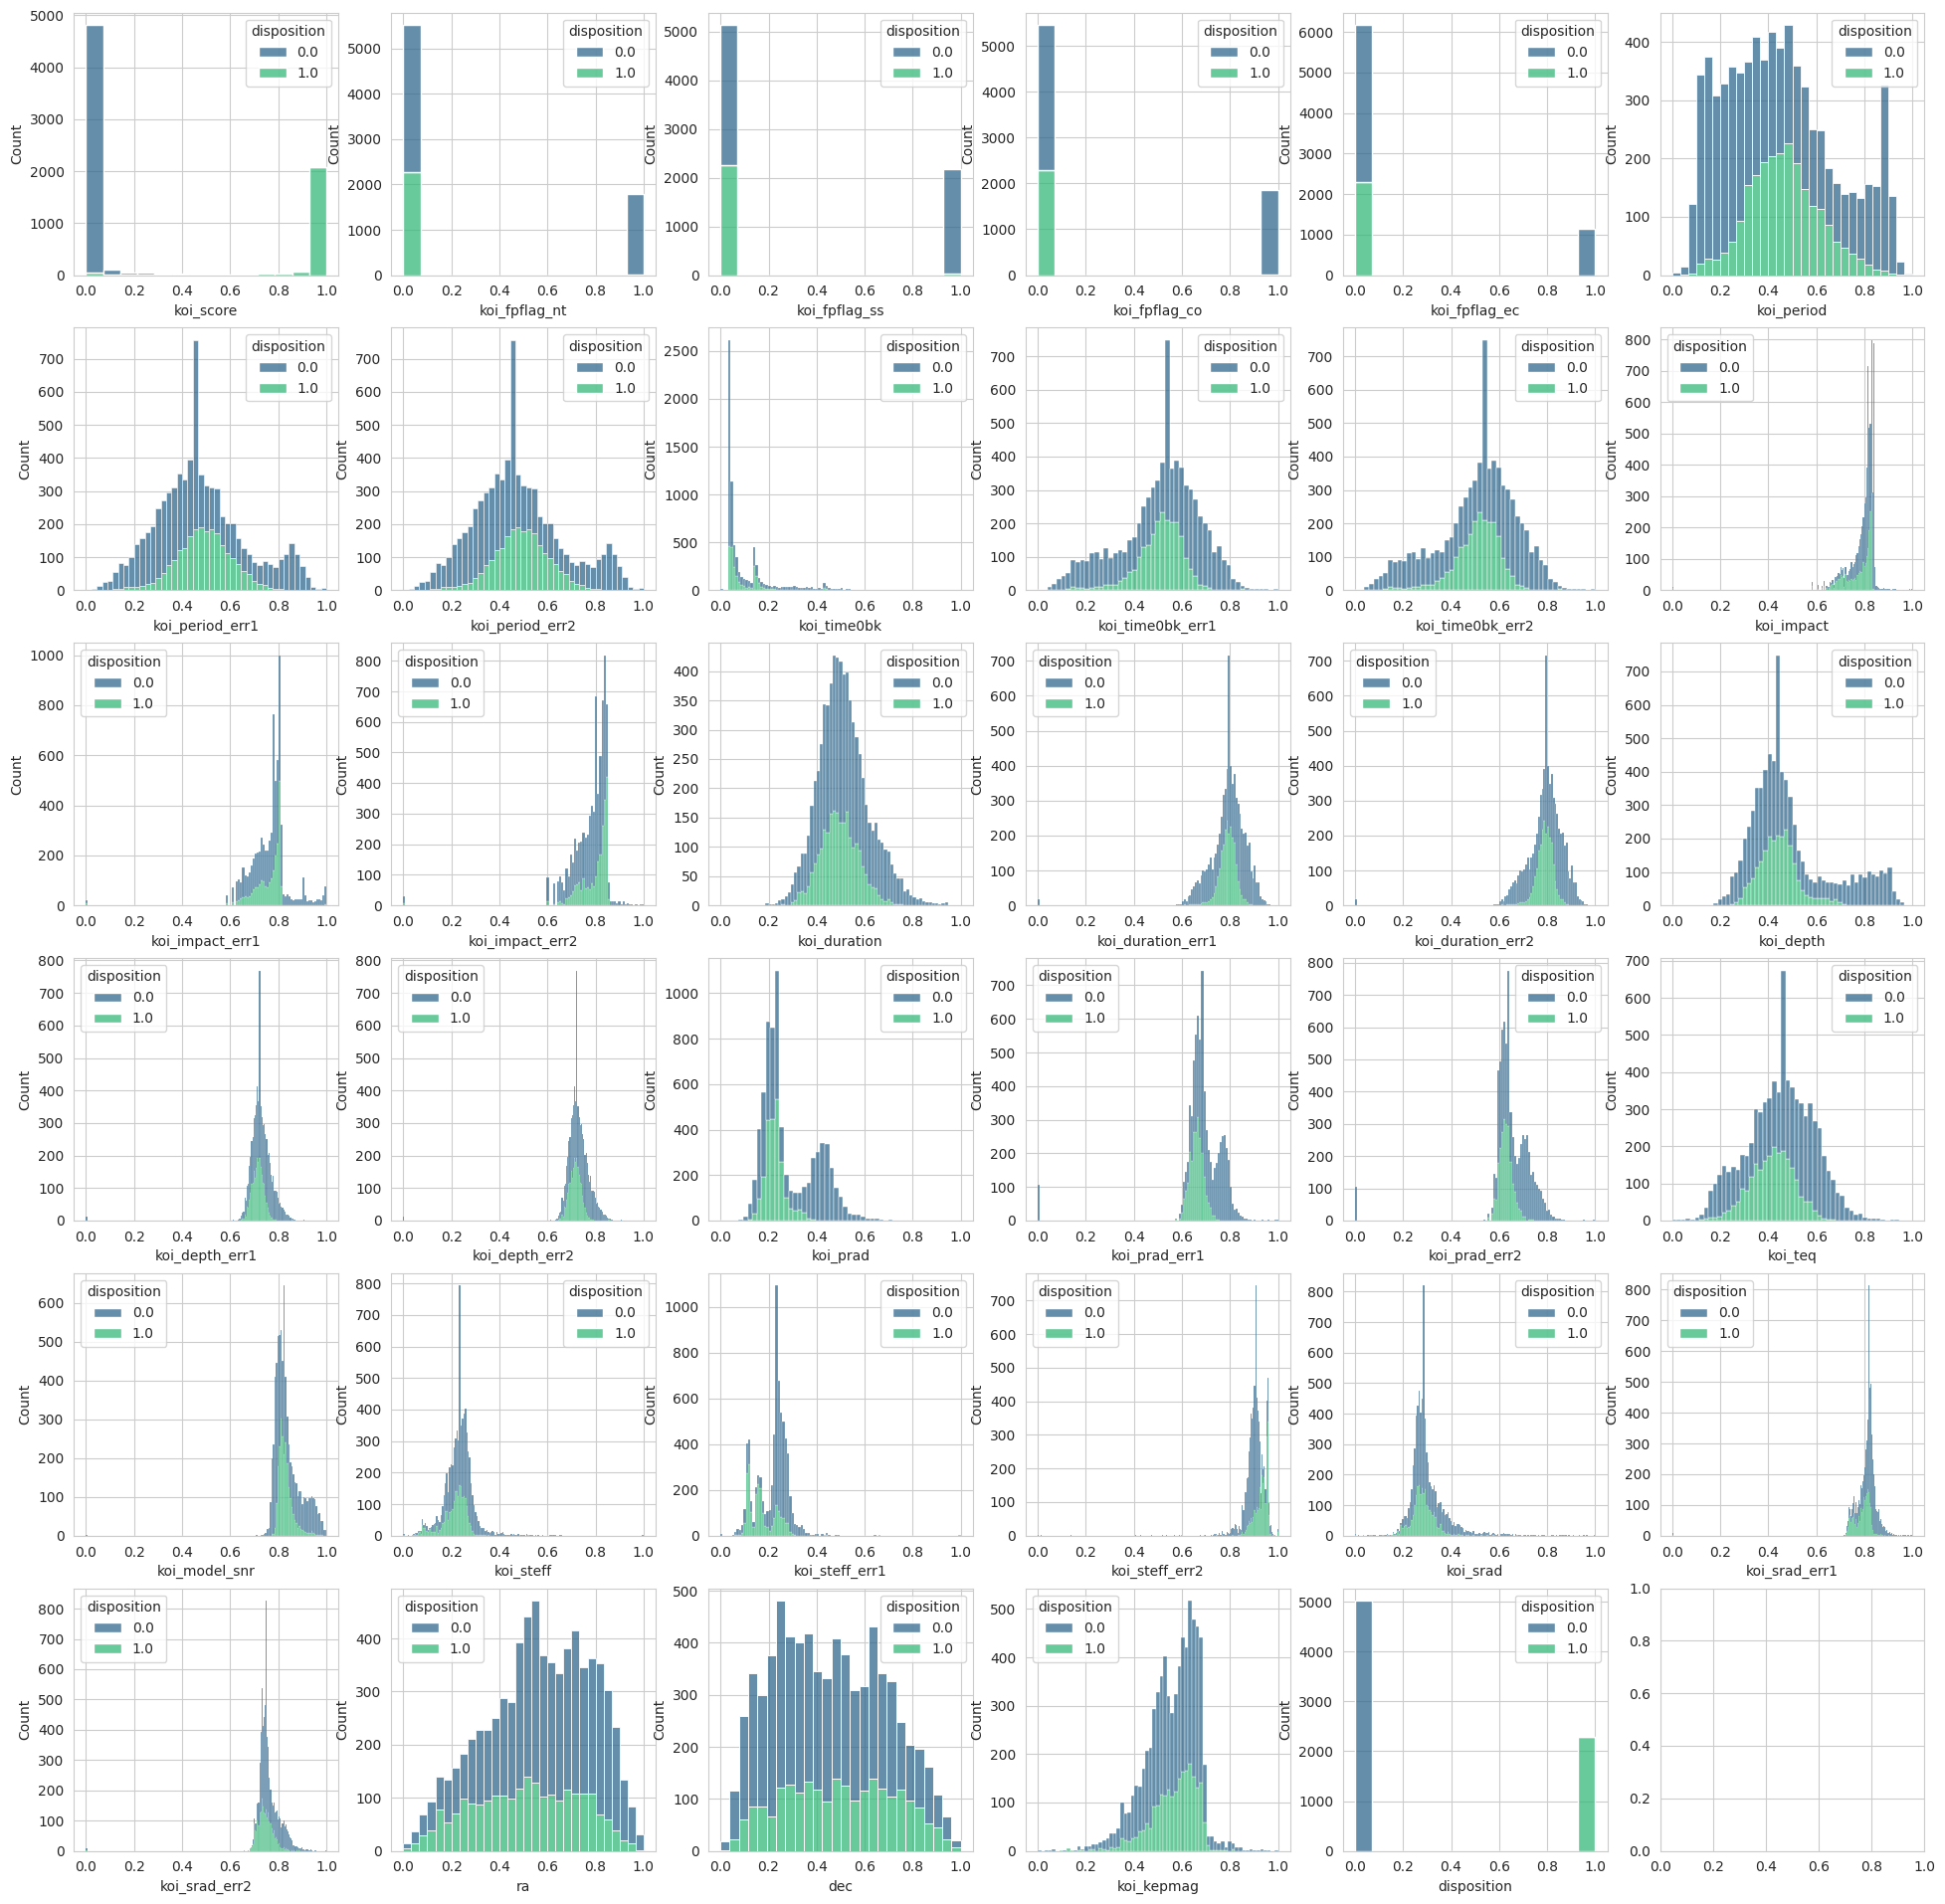

In [15]:
fig, ax = plt.subplots( 6, 6, figsize=(24, 24))
features = data.columns
for i in range( len(features)) :
    r, c = i//6, i%6
    sns.histplot( x=data_norm[features[i]], hue=data_norm["disposition"], palette="viridis", multiple="stack", ax=ax[r][c])

### low score confirmed planets and high score false positives

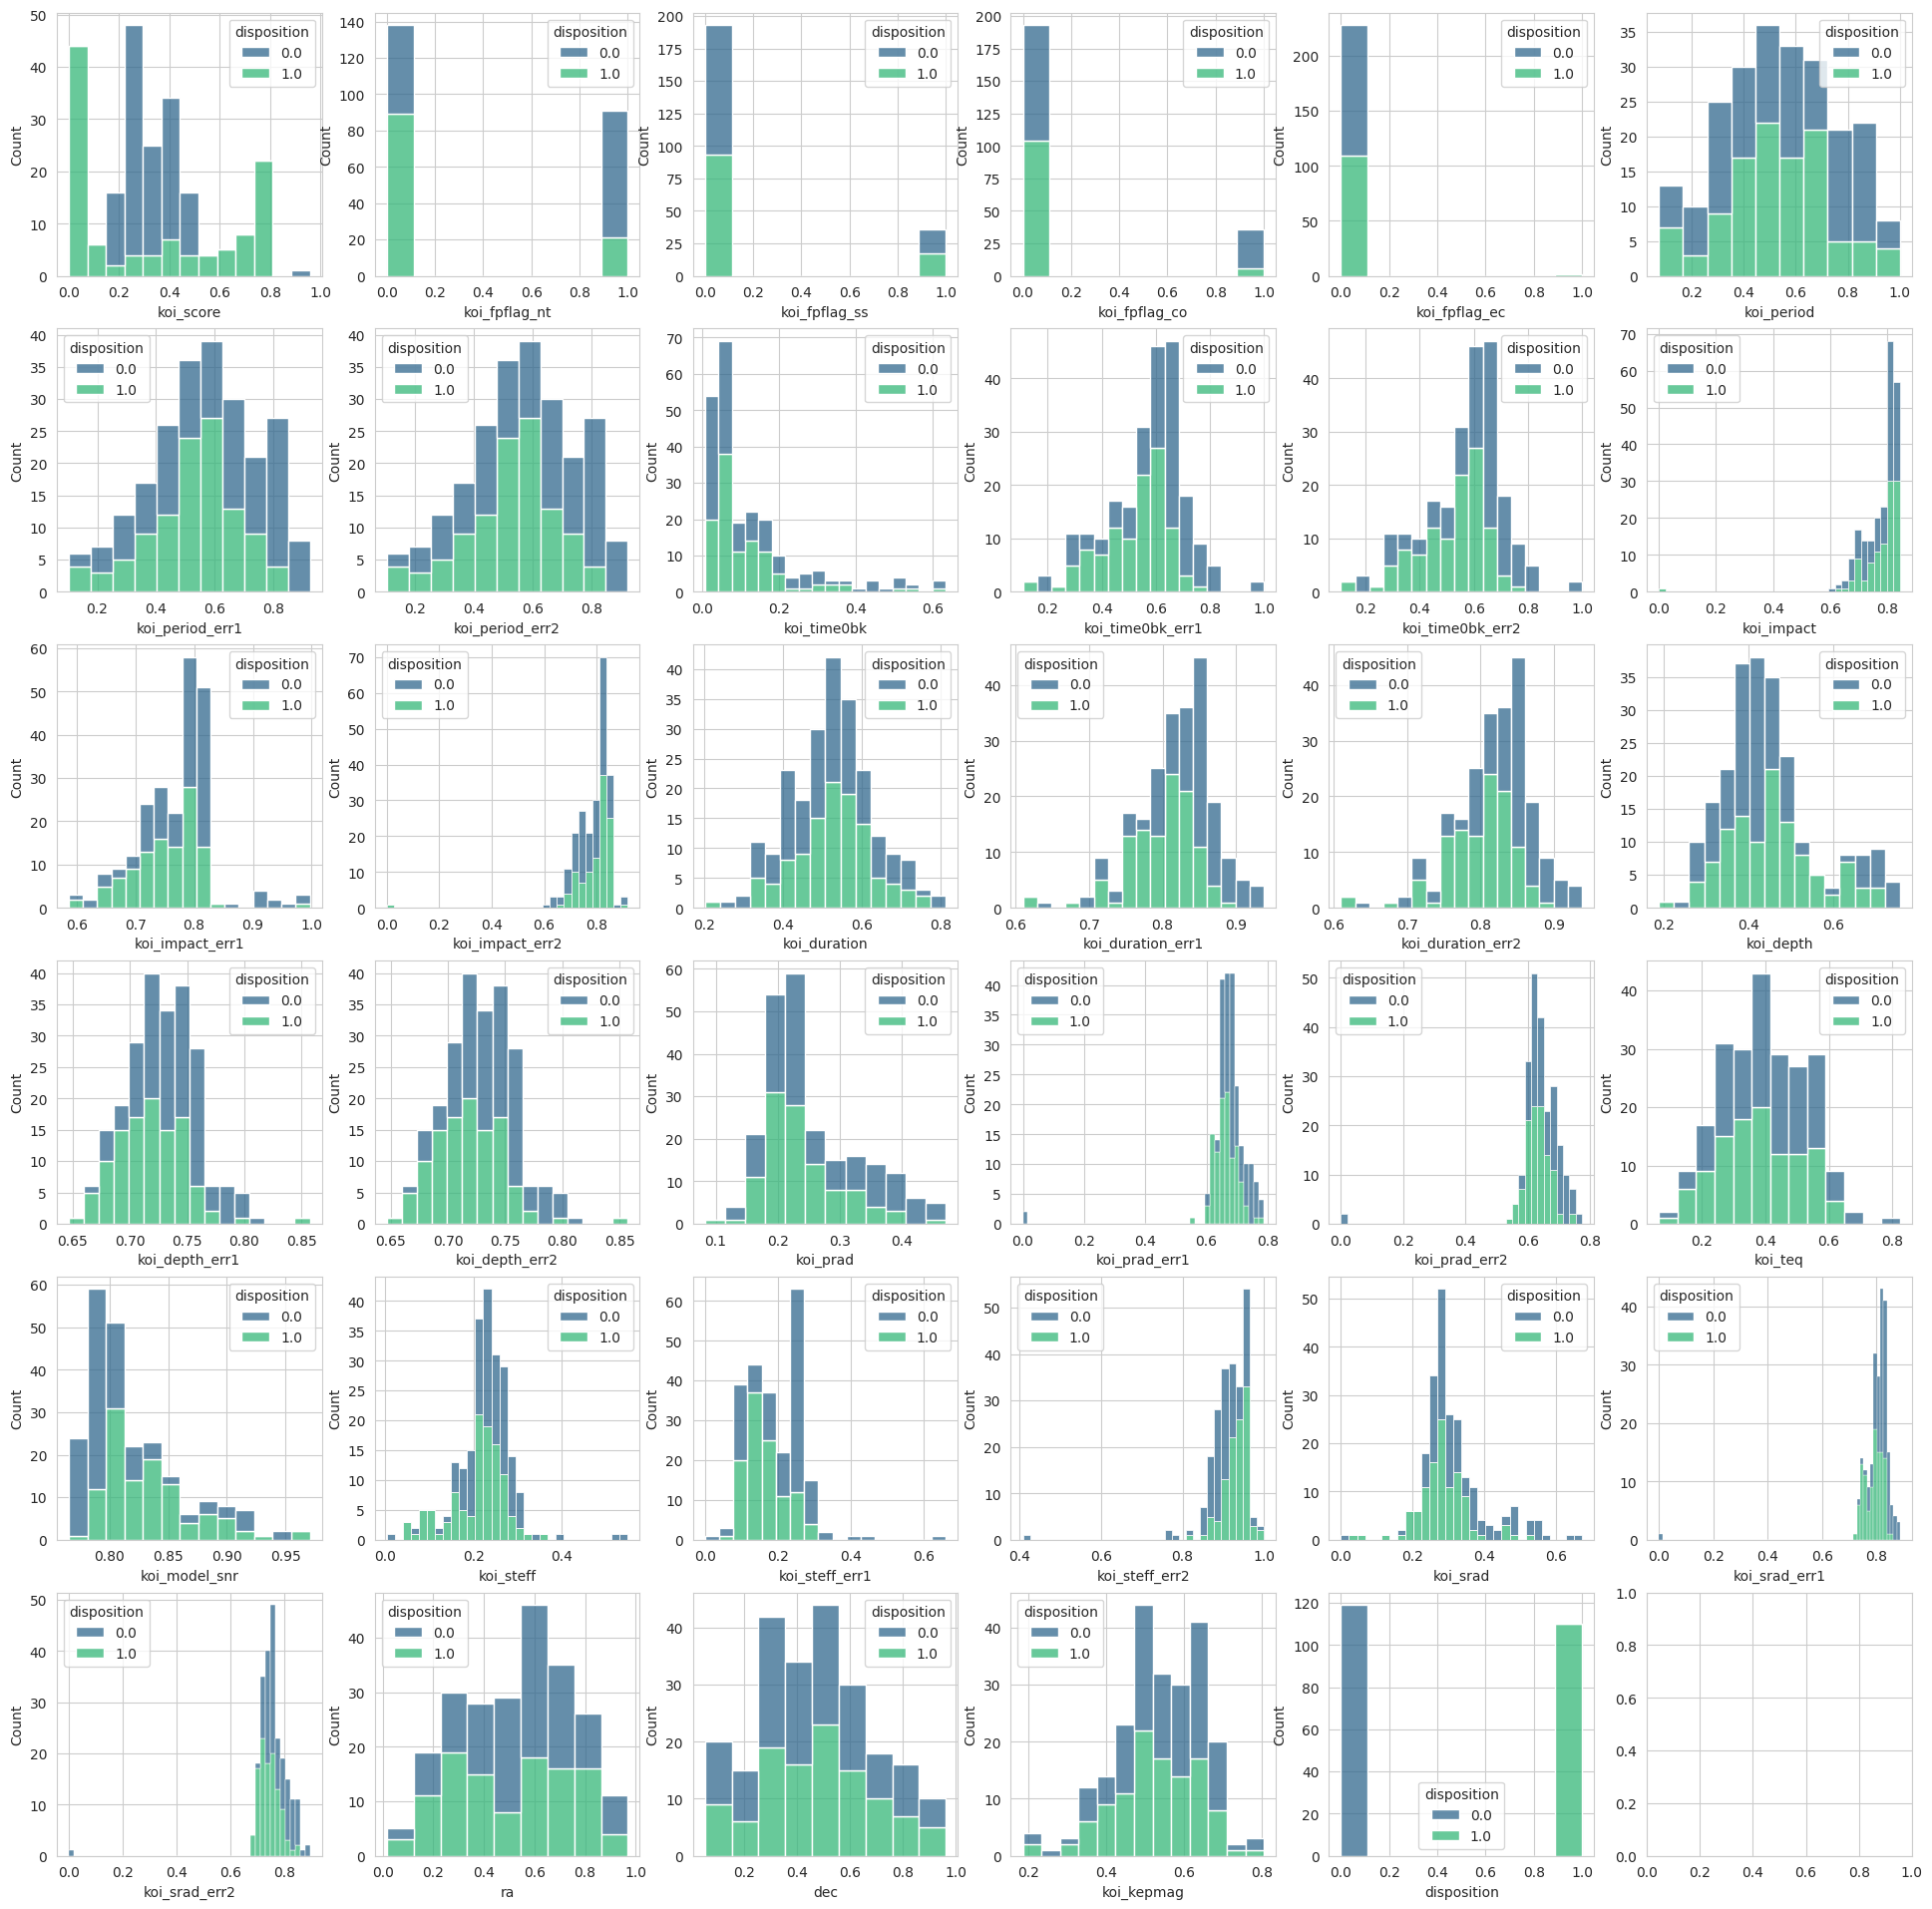

In [71]:
df = pd.concat(
    [
        data_norm[(data_norm["disposition"] == 1) & (data_norm["koi_score"] < 0.8)],
        data_norm[(data_norm["disposition"] == 0) & (data_norm["koi_score"] > 0.2)],
    ],
    axis=0
)

fig, ax = plt.subplots( 6, 6, figsize=(24, 24))
features = df.columns
for i in range( len(features)) :
    r, c = i//6, i%6
    sns.histplot( x=df[features[i]], hue=df["disposition"], palette="viridis", multiple="stack", ax=ax[r][c])